# <center> Unsupervised learning: Clusterings </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. Partitioning clustering: `k-means`

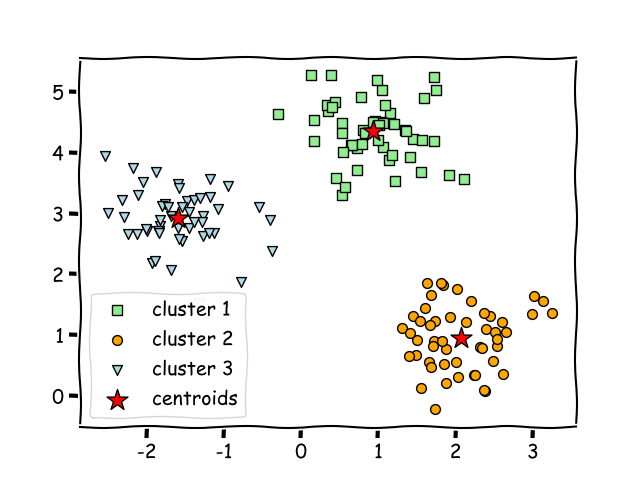

https://www.youtube.com/watch?v=4b5d3muPQmA

#### Step 1: Randomly select centroids
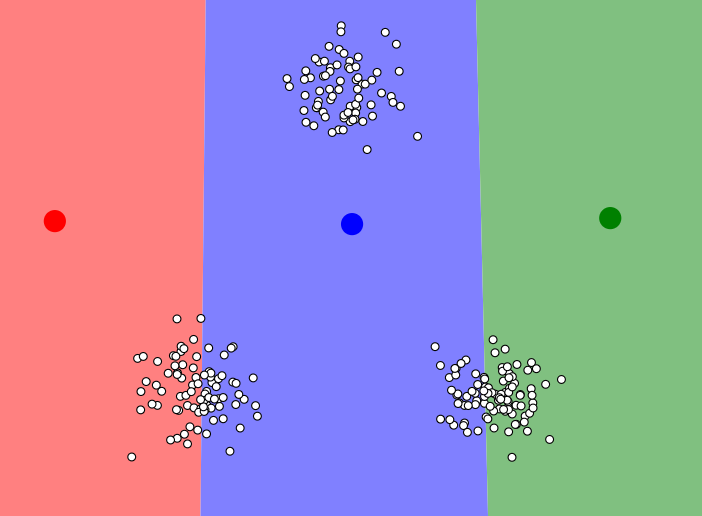
#### Step 2: Calculate the distance of all data points to centroids and assign data points to the closest cluster
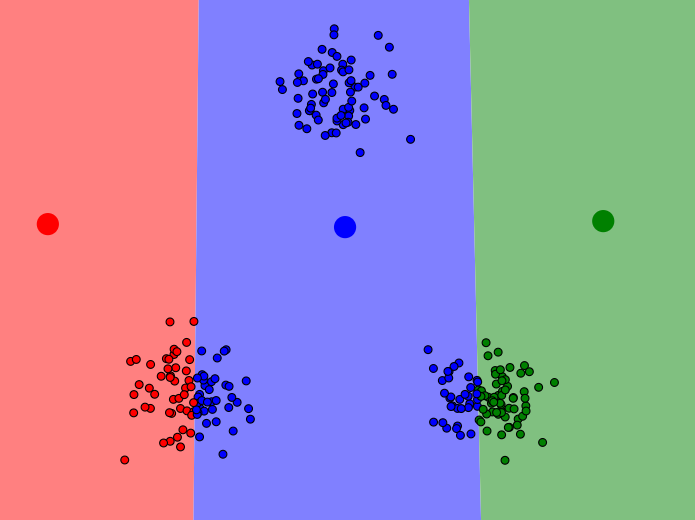
#### Step 3: Calculate the new centroids of each cluster by taking the mean
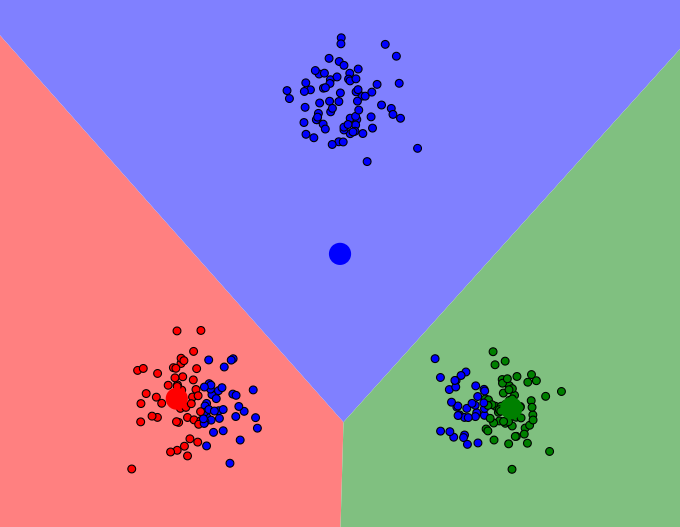
#### Step 4: Re-assign data points to the closest cluster center
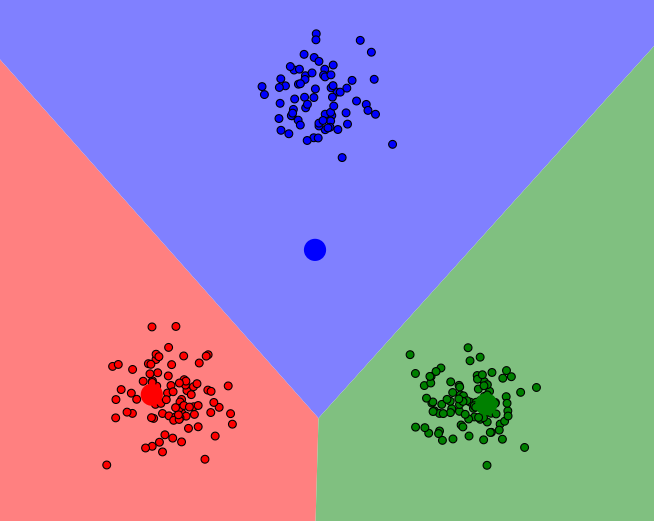
#### Step 5: Model converges when cluster centers (centroids) no longer move
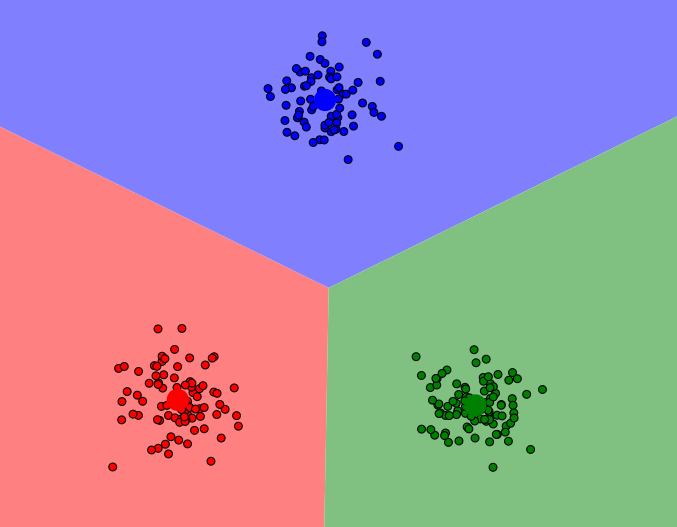

In [3]:
from sklearn.cluster import KMeans

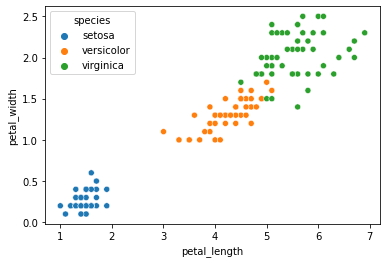

In [4]:

plt.show()

In [6]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

array(['virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versic

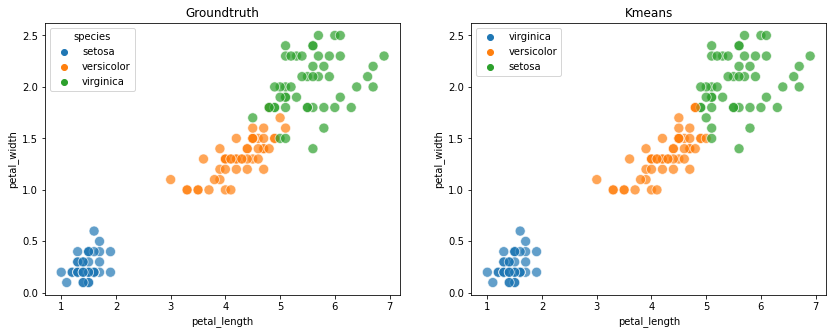

In [11]:
fig, axs = plt.subplots(1,2, figsize=(14,5))

plt.show()

In [ ]:
# 0 -> setosa
# 1 -> virginica
# 2 -> versicolor

### External validation

In [17]:
from sklearn.metrics import classification_report


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.96      0.94        50
   virginica       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



### Internal validation

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

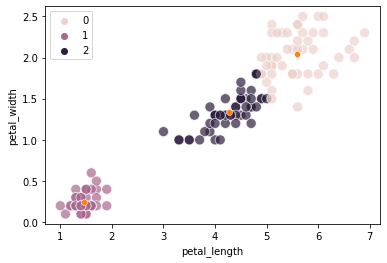

In [15]:
kmeans.inertia_

31.371358974358966

In [16]:
# For loop - k [1,10]


[(1, 550.8953333333333),
 (2, 86.39021984551391),
 (3, 31.371358974358966),
 (4, 19.48300089968511),
 (5, 13.983213141025644),
 (6, 11.070652341896283),
 (7, 9.203314009661833),
 (8, 7.624193062579726),
 (9, 6.646704739704738)]

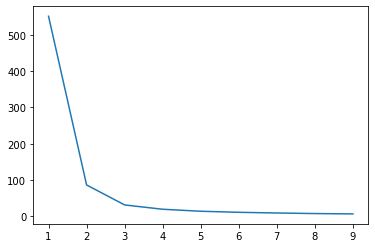

In [18]:
d = np.array(d)
plt.plot(d[:,0],d[:,1])
plt.show()

## 2. Hierachical clustering: `agglomerative clustering` 
https://www.youtube.com/watch?v=7xHsRkOdVwo
![](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-28-at-11.48.48-am.png)

In [23]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

<!-- ![](https://miro.medium.com/max/1039/0*afzanWwrDq9vd2g-) -->

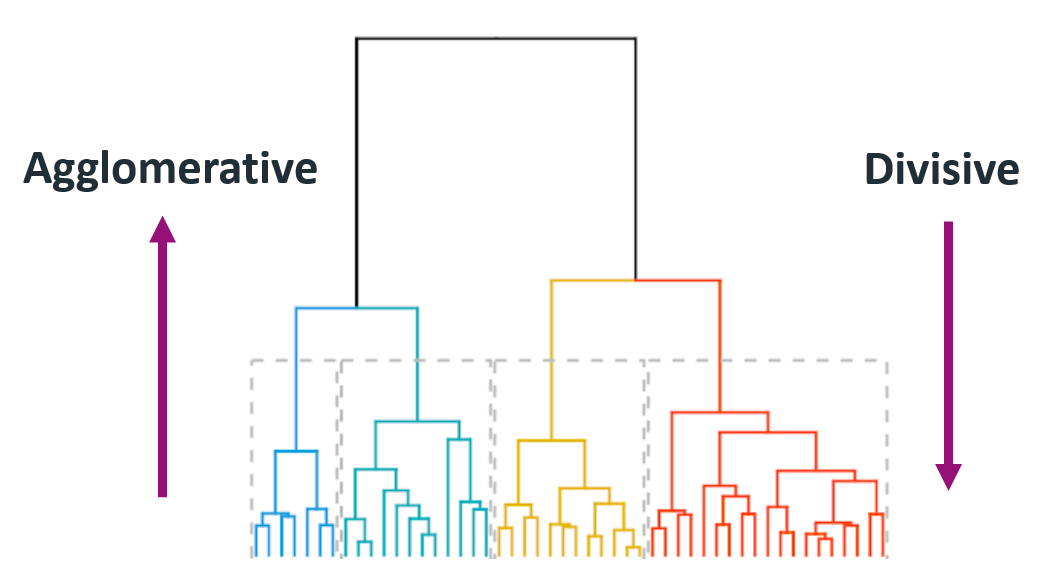

In [24]:
value_map = {1:'setosa',2:'versicolor',0:'virginica'}
y_pred2 = np.array([value_map[i] for i in y_pred])
y_pred2

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       

Text(0.5, 1.0, 'Agglomerative')

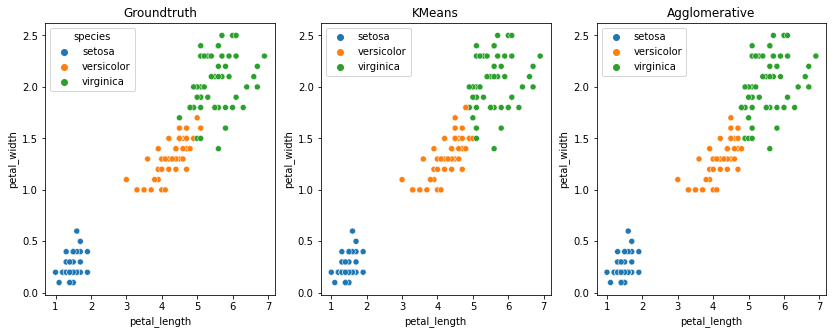

In [26]:
fig, axs = plt.subplots(1,3, figsize=(14,5))


## 3. Density-based clustering: `DBSCAN`
https://www.youtube.com/watch?v=RDZUdRSDOok
![](https://user-images.githubusercontent.com/7659/74451662-d2325000-4e34-11ea-9770-a57e81259eb9.png)

<!-- ![](https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif) -->

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2dd2WD8Sx4EQUq3I_nDjJucFXl_rEYTHVhQ&usqp=CAU

In [27]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=5)
y_pred3 = dbscan.fit_predict(X)

Text(0.5, 1.0, 'DBSCAN')

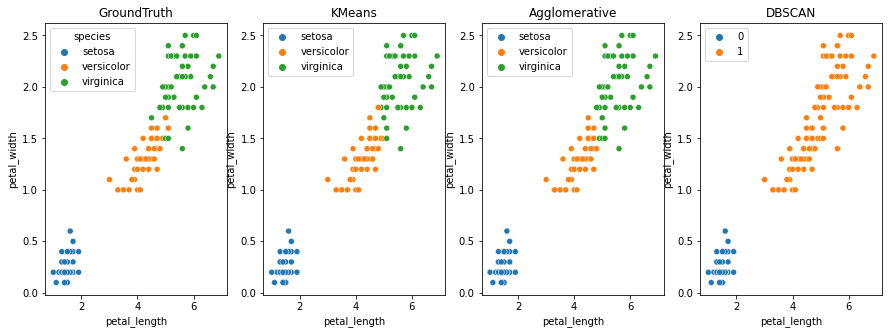

In [30]:
fig, axs = plt.subplots(1,4, figsize=(15,5))
